**MathTools HW3** 
2024-10-25

Question 4

(a)

In [205]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.io

In [206]:
# Create a 128-sample signal g_{0}
N = 128
x = np.arange(N)
frequencies = [3, 13, 60] 
amplitudes = [0.2, 0.3, 1.0]

g0 = (amplitudes[0] * np.sin(2 * np.pi * frequencies[0] * x / N) +
      amplitudes[1] * np.sin(2 * np.pi * frequencies[1] * x / N) +
      amplitudes[2] * np.sin(2 * np.pi * frequencies[2] * x / N))

In [207]:
# Subsample
gs = g0[::2]

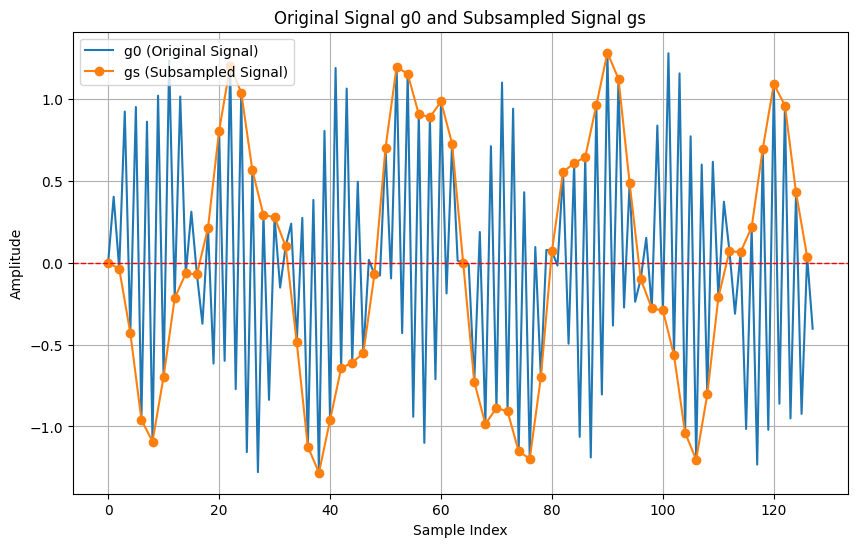

In [208]:
plt.figure(figsize=(10, 6))
plt.plot(x, g0, label='g0 (Original Signal)')
plt.plot(x[::2], gs, label='gs (Subsampled Signal)', marker='o')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title('Original Signal g0 and Subsampled Signal gs')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

(b)

In [209]:
def downsample(signal):
    kernel = np.array([1/16, 1/4, 3/8, 1/4, 1/16])

    convolved = np.convolve(signal, kernel, mode='same')
    downsample_result = convolved[::2]

    return downsample_result

In [210]:
g1 = downsample(g0)

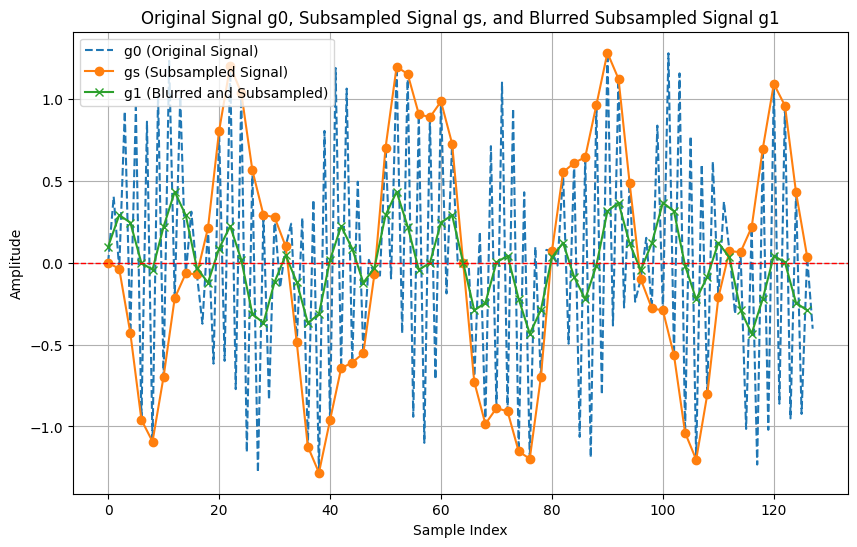

In [211]:
plt.figure(figsize=(10, 6))
plt.plot(x, g0, linestyle='--', label='g0 (Original Signal)')
plt.plot(x[::2], gs, label='gs (Subsampled Signal)', marker='o')
plt.plot(x[::2], g1, label='g1 (Blurred and Subsampled)', marker='x')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title('Original Signal g0, Subsampled Signal gs, and Blurred Subsampled Signal g1')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

(c)

In [212]:
# Up sampling
def upSample(signal):
    #first adds samples with value zero between every sample of gi (plus an extra one at the end)
    add_zero = np.zeros(len(signal)*2)
    add_zero[::2] = signal
    # You will need to multiply all the values of the kernel by 2 to yield an up-sampled signal with approximately the same values as you started with.
    kernal_c = np.array([1/16, 1/4, 3/8, 1/4, 1/16]) * 2

    # Convolution
    upSample_blurred = np.convolve(add_zero, kernal_c, mode='same')
    return upSample_blurred

In [213]:
upSampled_g1 = upSample(g1)

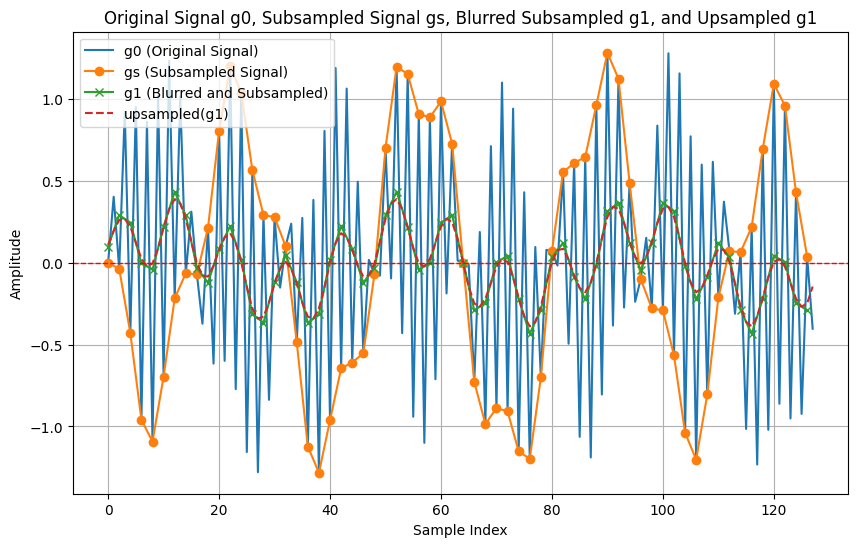

In [214]:
plt.figure(figsize=(10, 6))
plt.plot(x, g0, label='g0 (Original Signal)')
plt.plot(x[::2], gs, label='gs (Subsampled Signal)', marker='o')
plt.plot(x[::2], g1, label='g1 (Blurred and Subsampled)', marker='x')
plt.plot(x, upSampled_g1, label='upsampled(g1)', linestyle='--')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title('Original Signal g0, Subsampled Signal gs, Blurred Subsampled g1, and Upsampled g1')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

The up-sampled signal has been smoother and has the approximate shape of the original signal but has been prunned with high-frequency details that is lost during downsampling in previous question.
These differences is because of the procedure called aliasing. Aliasing happens when high frequencies in the original signal appear as lower frequencies in the downsampled signal.

(d)

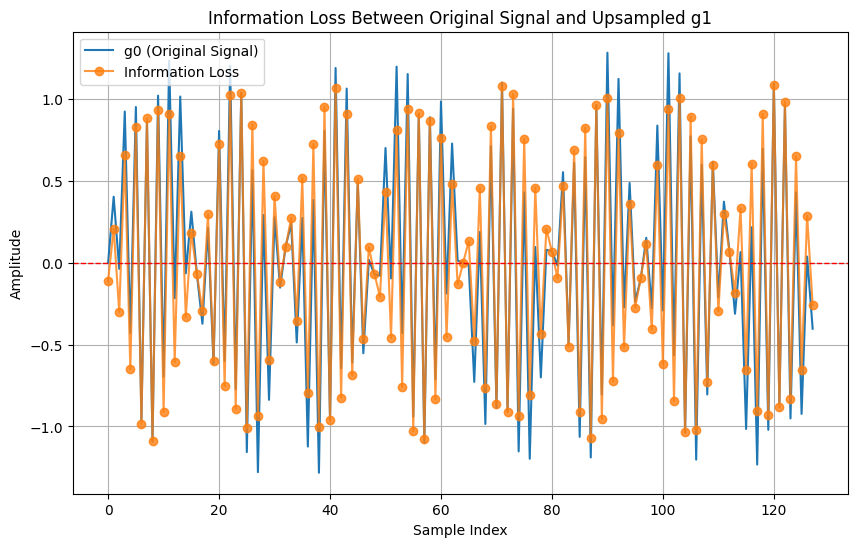

In [215]:
l0 = g0 - upSampled_g1 

# Plotting the result
plt.figure(figsize=(10, 6))
plt.plot(x, g0, label='g0 (Original Signal)')
plt.plot(x, l0, label='Information Loss', marker='o', alpha = 0.8)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title('Information Loss Between Original Signal and Upsampled g1')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()



This is showing the information loss of high-frequency when downsampling g0 to create g1 and then upsampling back.

(e)

In [216]:
iterates = 5
gaussian_pyramid = [g0]
laplacian_pyramid = []

In [217]:
for i in range(iterates):
    gi = gaussian_pyramid[-1]
    gi_next = downsample(gi)
    gaussian_pyramid.append(gi_next)

    #li = gi - upSample(gi+1)
    upSampled_gi_next = upSample(gi_next)
    li = gi - upSampled_gi_next[:len(gi)]
    laplacian_pyramid.append(li)

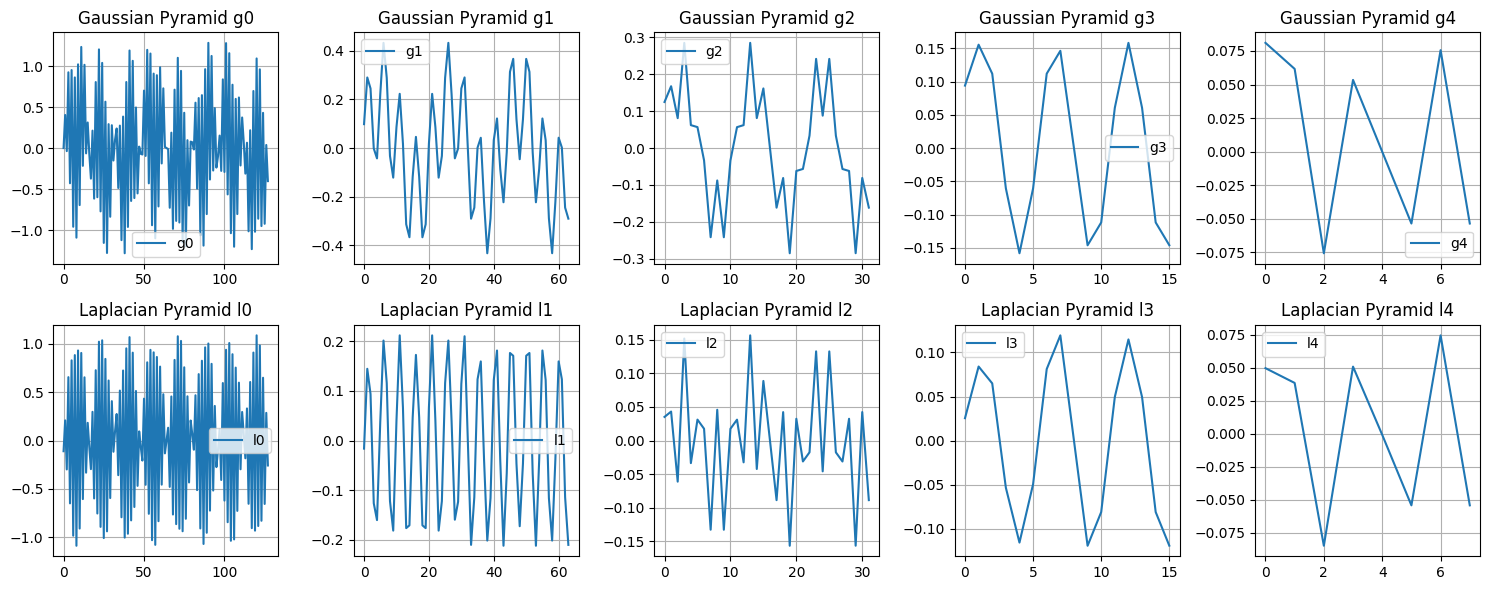

In [218]:
fig, axs = plt.subplots(2, iterates, figsize=(15, 6))

for i in range(iterates):
    axs[0, i].plot(gaussian_pyramid[i], label=f'g{i}')
    axs[0, i].set_title(f'Gaussian Pyramid g{i}')
    axs[0, i].legend()
    axs[0, i].grid(True)

    axs[1, i].plot(laplacian_pyramid[i], label=f'l{i}')
    axs[1, i].set_title(f'Laplacian Pyramid l{i}')
    axs[1, i].legend()
    axs[1, i].grid(True)

plt.tight_layout()
plt.show()

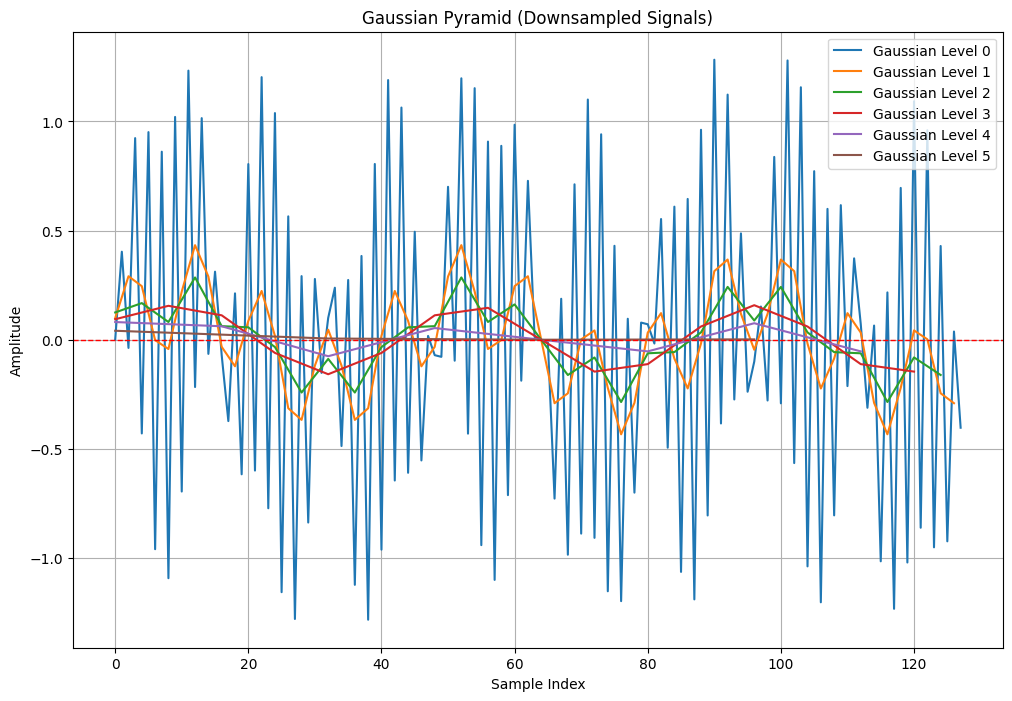

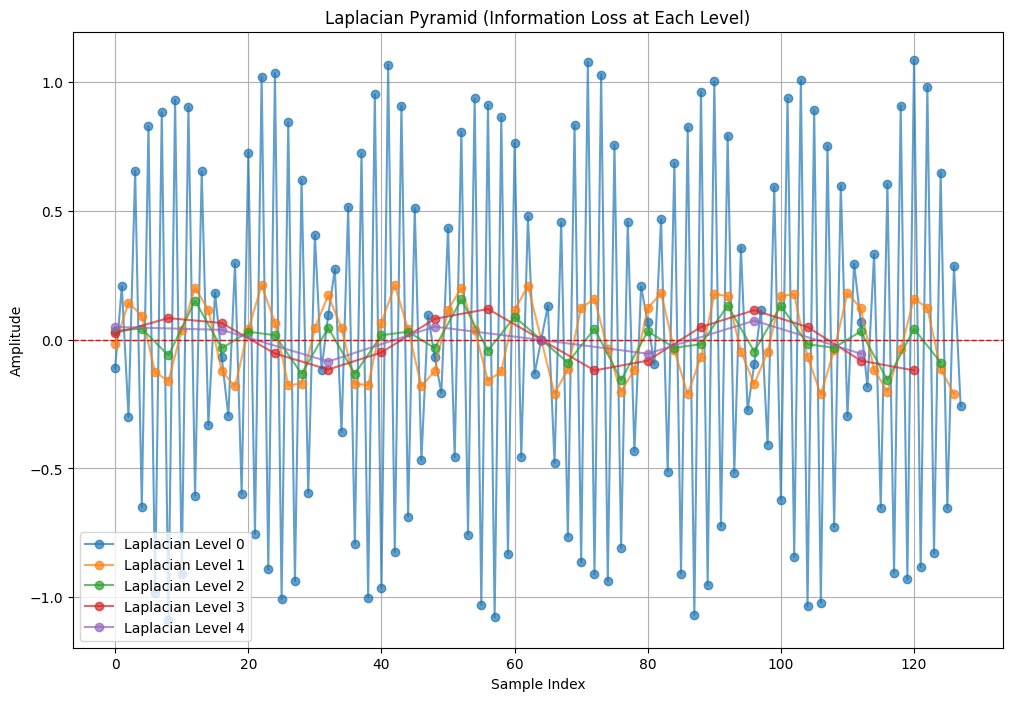

In [219]:
# Plotting on the same graph
# Plot the Gaussian Pyramid
plt.figure(figsize=(12, 8))
for i, gi in enumerate(gaussian_pyramid):
    plt.plot(np.arange(len(gi)) * (2**i), gi, label=f'Gaussian Level {i}')

plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title('Gaussian Pyramid (Downsampled Signals)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# Plot the Laplacian Pyramid
plt.figure(figsize=(12, 8))
for i, li in enumerate(laplacian_pyramid):
    plt.plot(np.arange(len(li)) * (2**i), li, label=f'Laplacian Level {i}', marker='o', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title('Laplacian Pyramid (Information Loss at Each Level)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

(f)

In [220]:
iterates = 5
gaussian_pyramid = [g0]

for i in range(iterates):
    gi = gaussian_pyramid[-1]
    gi_next = downsample(gi)
    gaussian_pyramid.append(gi_next)

In [221]:
#Tracing back to original
target_length=128
def upsample_to_original(signal,target_length):
    while len(signal) < target_length:
        signal = upSample(signal)
    return signal[:target_length] 

In [222]:
upsampled_gaussian_pyramid = [upsample_to_original(gi,target_length) for gi in gaussian_pyramid]

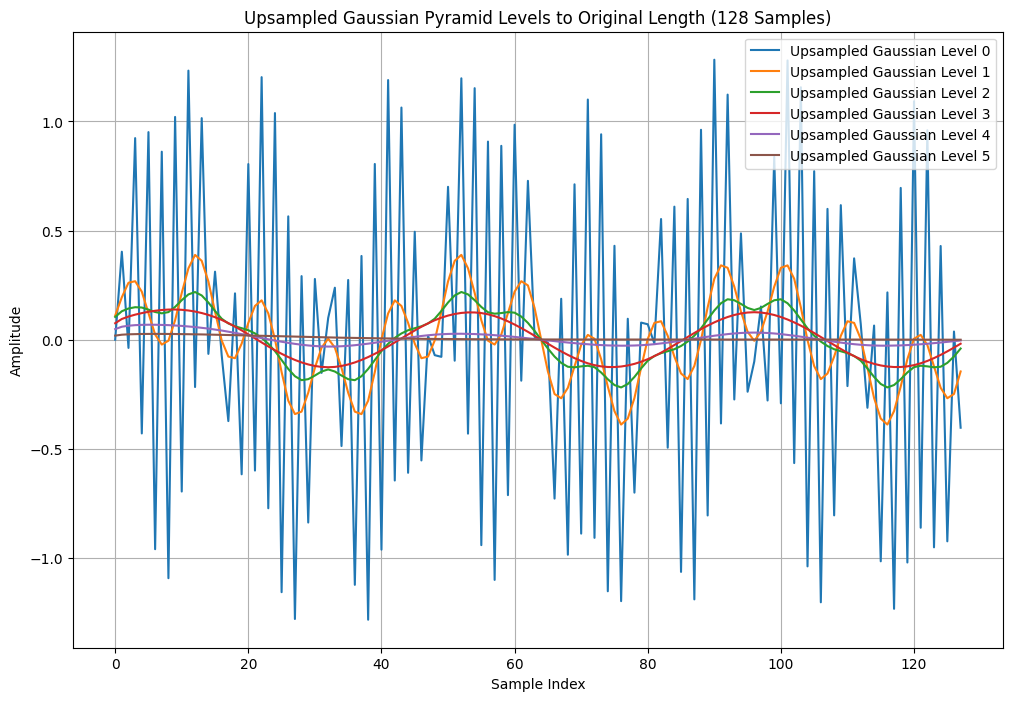

In [223]:
plt.figure(figsize=(12, 8))
for i, upsampled_gi in enumerate(upsampled_gaussian_pyramid):
    plt.plot(np.arange(128), upsampled_gi, label=f'Upsampled Gaussian Level {i}')
plt.title('Upsampled Gaussian Pyramid Levels to Original Length (128 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

The upsampling of each Gaussian pyramid back to the original length shows that the lower levels retain more detail, including high frequencie, and each level is losing progressively more detail.

(g)

In [224]:
target_length=128
laplacian_pyramid_upsampled = [upsample_to_original(li,target_length) for li in laplacian_pyramid]
upsampled_g5 = upsample_to_original(gaussian_pyramid[-1], target_length)

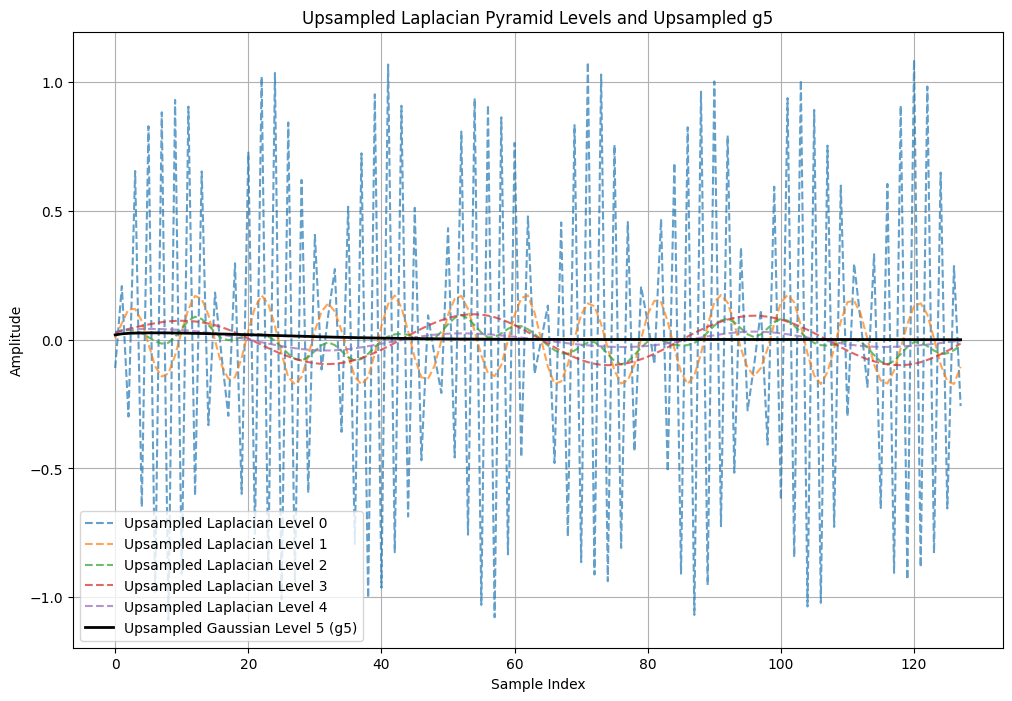

In [225]:
plt.figure(figsize=(12, 8))
for i, upsampled_li in enumerate(laplacian_pyramid_upsampled):
    plt.plot(np.arange(128), upsampled_li, label=f'Upsampled Laplacian Level {i}', linestyle='--', alpha=0.7)
plt.plot(np.arange(128), upsampled_g5, label='Upsampled Gaussian Level 5 (g5)', color='black', linewidth=2)
plt.title('Upsampled Laplacian Pyramid Levels and Upsampled g5')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

In this graph, we can see that Level 0 has the largest amplitude because it captures the finest details and highest frequencies from the original signal. As moving to higher Laplacian levels (Levels 1 to 4), the amplitude decreases, indicating that these levels capture progressively lower-frequency details.
For level 5, the black line represents the broadest, lowest-frequency structure of the original signal. It's the lowest frequency details since it retains only the overall trend of the signal without any fine details since it's been downsampled too many times.  

(h)

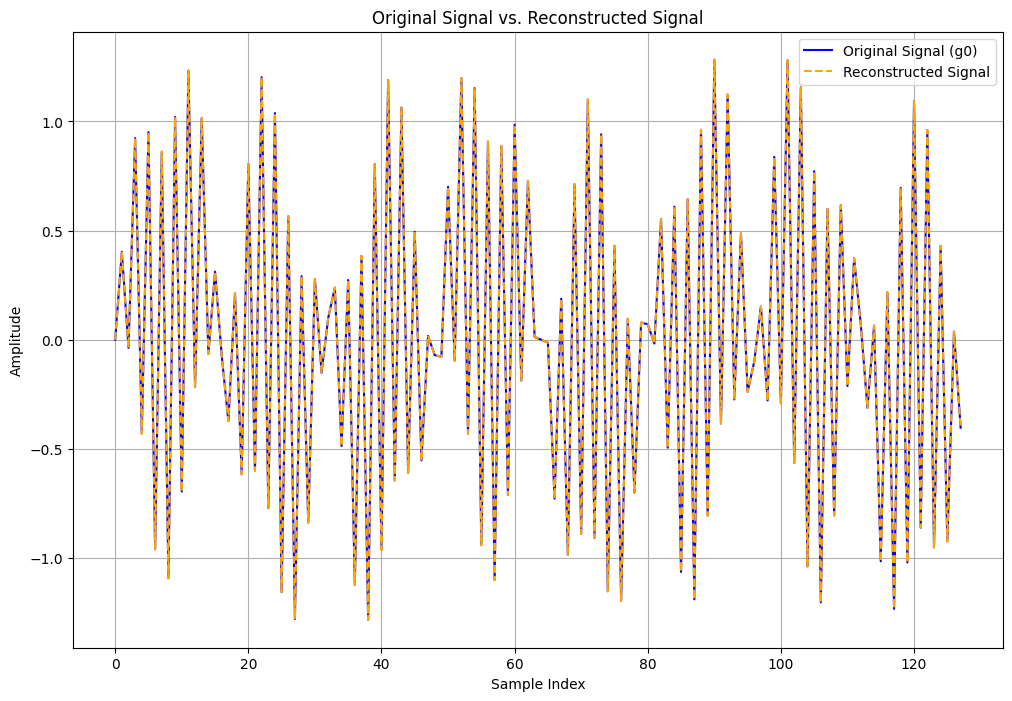

In [226]:
reconstructed_signal = upsampled_g5.copy()
for upsampled_li in laplacian_pyramid_upsampled:
    reconstructed_signal += upsampled_li

plt.figure(figsize=(12, 8))
plt.plot(np.arange(128), g0, label='Original Signal (g0)', color='blue')
plt.plot(np.arange(128), reconstructed_signal, label='Reconstructed Signal', linestyle='--', color='orange')
plt.title('Original Signal vs. Reconstructed Signal')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

The constructed signal is closely matched to the original signal g0. Since Laplacian pyramid levels capture the high-frequency details lost during downsampling, while the Gaussian pyramid’s final level captures the lowest-frequency, broad structure of the signal. Thus, the Gaussian and Laplacian pyramids together retain all the information needed to rebuild the original signal.